## Linear Regression with PyTorch

- Allows us to understand relationship between two continous variables
- Example:
    x: Independent Variable
      - weight
    y: dependent Variable
      - height
- y = mx + c

In [10]:
import numpy as np
import matplotlib.pyplot as plt

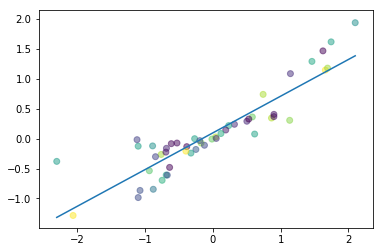

In [11]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.rand(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### Aim:
- Minimize distance between points and line ( y = mx + c)
- Adjusting
    1. Coefficient/Slope: m
    2. Bias/Intercept: c

## Example

Assuming the relation/equation we are looking for is ``y = 2x + 1``
- So here
    - Coefficient/slope = 2
    - Bias/Intercept = 1

In [12]:
#Toy data
x_values = [ i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
#convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [14]:
# 2D Required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

Equation: y = 2x + 1

In [15]:
y_values = [ 2*i + 1 for i in x_values ]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [16]:
#If you are weak in list iterators..
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)
    
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [17]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [18]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### Lets Build Model 

In [19]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#### Model
1. Linear model
    - True equation: y = 2x + 1
2. Forward
    - Example
        - Input x = 1
        - Output y' = ?

In [20]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        #here input_dim= x, output_dim= y
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Instantiate Model
 - Input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 - Desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [21]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#### Instantiate Loss Class
- MSE Loss: Mean Squared Error
-\begin{equation*}
 MSE = 1/n \sum_{i=1}^n (y'_i - y_i)
\end{equation*}
    - y' : prediction
    - y : true value
    


In [22]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class
- Simplified equation
    - \begin{equation*}
       \theta = \theta - \eta . \nabla_\theta
       \end{equation*}
        - θ : parameters (our variables)
        - η : Learning rate
        - \begin{align}
        \nabla_\theta : \text{Parameters gradients}
          \end{align}
          
- Even Simpler equation
    - ``parameters = parameters - learning_rate * parameters_gradients``
        - parameters: m and c in y = mx + c
        - desired parameters: m = 2 and x = 1 in y = 2x + 1

In [23]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train Model

- 1 epoch: going through whole x_train data once
     - 100 epochs: 
         - 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- Process
    1. Convert inputs/labels to variables
    2. Clear gradient buffers
    3. Get output, given inputs
    4. Get loss
    5. Get gradients wrt params.
    6. Update params using gradients
        - ``parameters = parameters - learning_rate * parameters_gradients``
    7. Repeat

In [24]:
epochs = 100

for epoch in range(epochs):
    epoch += 1
    
    #Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear gradient wrt params
    optimizer.zero_grad()
    
    #forward pass to get output
    outputs = model(inputs)
    
    #calculate loss
    loss = criterion(outputs, labels)
    
    #Get gradients wrt params
    loss.backward()
    
    #update params
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 61.150272369384766
epoch 2, loss 5.553335666656494
epoch 3, loss 1.012154221534729
epoch 4, loss 0.6355008482933044
epoch 5, loss 0.5986039042472839
epoch 6, loss 0.5894885659217834
epoch 7, loss 0.5827074646949768
epoch 8, loss 0.5761843323707581
epoch 9, loss 0.5697488784790039
epoch 10, loss 0.5633864998817444
epoch 11, loss 0.5570952892303467
epoch 12, loss 0.5508741736412048
epoch 13, loss 0.5447227358818054
epoch 14, loss 0.538640022277832
epoch 15, loss 0.532625138759613
epoch 16, loss 0.5266773700714111
epoch 17, loss 0.5207960605621338
epoch 18, loss 0.5149802565574646
epoch 19, loss 0.5092295408248901
epoch 20, loss 0.5035431981086731
epoch 21, loss 0.4979200065135956
epoch 22, loss 0.49235981702804565
epoch 23, loss 0.4868621528148651
epoch 24, loss 0.48142531514167786
epoch 25, loss 0.4760492444038391
epoch 26, loss 0.4707331955432892
epoch 27, loss 0.4654766023159027
epoch 28, loss 0.46027860045433044
epoch 29, loss 0.4551388919353485
epoch 30, loss 0.4500565

### Compare Results


In [25]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.15763681],
       [  2.27894473],
       [  4.40025234],
       [  6.52156019],
       [  8.64286804],
       [ 10.76417637],
       [ 12.88548374],
       [ 15.00679207],
       [ 17.12809944],
       [ 19.24940681],
       [ 21.37071609]], dtype=float32)

In [40]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

### Visualize

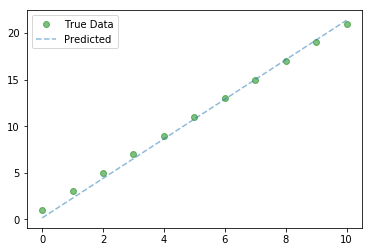

In [27]:
plt.clf()

plt.plot(x_train, y_train, 'go', label='True Data', alpha = 0.5)

plt.plot(x_train, predicted, '--', label='Predicted', alpha = 0.5)

plt.legend(loc='best')
plt.show()

In [46]:
### Save model
save_model = False
if save_model is True:
    #saves only params
    torch.save(model.state_dict(), 'linear_model.pk1')

In [47]:
###Load model

In [49]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('linear_model.pk1'))